## Observations and Insights

## Dependencies and starter code

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, on="Mouse ID")
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and Standard Error of the Mean(SEM) of the tumor volume for each regimen

Drugs = mouse_study.groupby(['Drug Regimen'], as_index=False).agg({'Tumor Volume (mm3)' : ['mean','median','var','std','sem']})
Drugs_Effect = pd.DataFrame(Drugs)
#As agg function creates a multiindex and didn't allow me to work with that 
#I found this droplevel function thata allow me to split a multiindex
Drugs_Effect.columns = Drugs_Effect.columns.droplevel()
#As I decide to set groupby index as false the process delete de name so I have to reasig it again. 
Drugs_Effect.rename(columns={'':'Drug Regimen'}, inplace = True)
Drugs_Effect.columns

Index(['Drug Regimen', 'mean', 'median', 'var', 'std', 'sem'], dtype='object')

## Bar plots

<function matplotlib.pyplot.show(*args, **kw)>

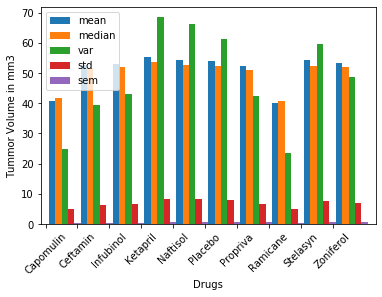

In [76]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
Drugsplot = Drugs_Effect.plot(kind='bar',width=1.0)
Drugsplot.set_xticklabels(Drugs_Effect['Drug Regimen'], rotation = 45)
Drugsplot.set_xticks(np.arange(len(Drugs_Effect['Drug Regimen']))-0.6)
Drugsplot.set_ylabel('Tummor Volume in mm3')
Drugsplot.set_xlabel('Drugs')
Drugsplot.legend(loc='best')
plt.show


In [9]:
Drugs_Effect.index.values

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype=object)

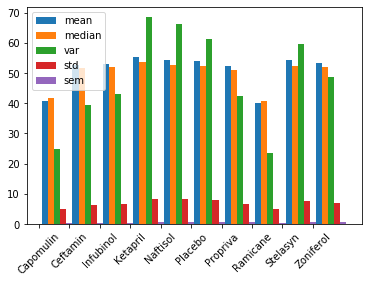

In [74]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x = len(Drugs_Effect['Drug Regimen'])
xval = np.arange(x)
fig, ax = plt.subplots()
ax.bar (xval-0.4,Drugs_Effect['mean'], width=0.2, align='center')
ax.bar (xval-0.2,Drugs_Effect['median'], width=0.2, align='center')
ax.bar (xval,Drugs_Effect['var'], width=0.2, align='center')
ax.bar (xval+0.2,Drugs_Effect['std'], width=0.2, align='center')
ax.bar (xval+0.4,Drugs_Effect['sem'], width=0.2, align='center')
ax.set_xticks(xval-0.6)
ax.set_xticklabels(Drugs_Effect['Drug Regimen'], rotation = 45)
ax.legend((Drugs_Effect.columns[1],Drugs_Effect.columns[2],Drugs_Effect.columns[3],Drugs_Effect.columns[4],Drugs_Effect.columns[5]))
plt.show()

## Pie plots

In [78]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

micesex = mouse_study.groupby(['Sex']).mean()
micesex.head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,
Female,11.700535,25.911230,19.433155,51.100657,1.065241
Male,13.901879,25.419624,19.707724,49.811764,0.979123


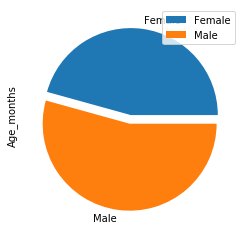

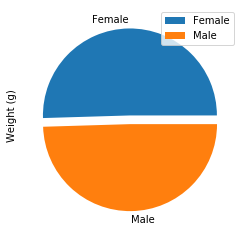

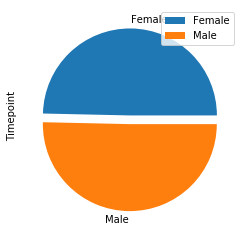

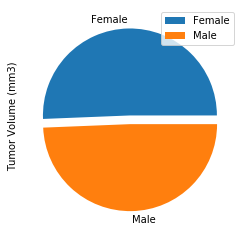

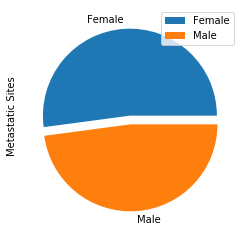

In [102]:
#Here when I tried to put all in one figure all plots appear overlapped, I couldn't find solutions in pandas.plot
micesex.plot(['Sex'], ['Age_months'], kind='pie', explode=(0,0.1) )
micesex.plot(['Sex'], ['Weight (g)'], kind='pie', explode=(0,0.1))
micesex.plot(['Sex'], ['Timepoint'], kind='pie', explode=(0,0.1))
micesex.plot(['Sex'], ['Tumor Volume (mm3)'], kind='pie', explode=(0,0.1))
micesex.plot(['Sex'], ['Metastatic Sites'], kind='pie', explode=(0,0.1))


In [10]:
micesex.head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,
Female,11.700535,25.911230,19.433155,51.100657,1.065241
Male,13.901879,25.419624,19.707724,49.811764,0.979123


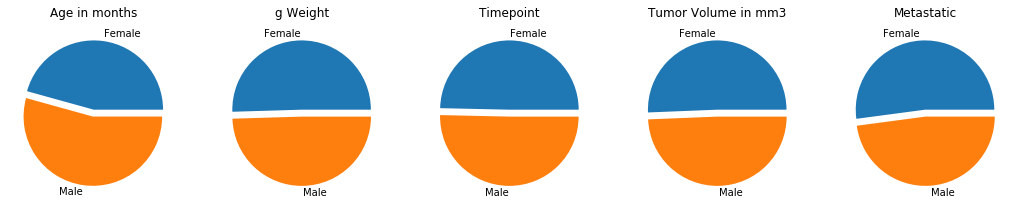

In [85]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']

fig2, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)
ax1.pie(micesex['Age_months'], labels=labels, explode=(0,0.1))
ax1.set_title('Age in months')
ax2.pie(micesex['Weight (g)'], labels=labels, explode=(0,0.1))
ax2.set_title('g Weight')
ax3.pie(micesex['Timepoint'], labels=labels, explode=(0,0.1))
ax3.set_title("Timepoint")
ax4.pie(micesex['Tumor Volume (mm3)'], labels=labels, explode=(0,0.1))
ax4.set_title("Tumor Volume in mm3")
ax5.pie(micesex['Metastatic Sites'], labels=labels, explode=(0,0.1))
ax5.set_title("Metastatic")
fig2.set_size_inches(18,5)


plt.show()

In [12]:
mouse_study['Drug Regimen'].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64

## Quartiles, outliers and boxplots

In [19]:
baba = mouse_study.loc[mouse_study["Mouse ID"].isin(['a366'])]
baba

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
494,a366,Stelasyn,Female,16,29,0,45.000000,0
495,a366,Stelasyn,Female,16,29,5,48.951368,0
496,a366,Stelasyn,Female,16,29,10,53.523990,0
497,a366,Stelasyn,Female,16,29,15,55.265582,0
498,a366,Stelasyn,Female,16,29,20,57.285987,0
499,a366,Stelasyn,Female,16,29,25,59.011728,0
500,a366,Stelasyn,Female,16,29,30,63.440686,1


In [21]:
#Calculate the final tumor volume of each mouse 
finalmice = mouse_study.groupby(['Mouse ID']).last()
finalmice = pd.DataFrame(finalmice)
# across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin.

bestmeds = finalmice.loc[finalmice['Drug Regimen'].isin(['Capomulin', 'Ramicane','Infubinol', 'Ceftamin'])]
bestmeds.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a275,Ceftamin,Female,20,28,45,62.999356,3
a411,Ramicane,Male,3,22,45,38.407618,1
a444,Ramicane,Female,10,25,45,43.047543,0


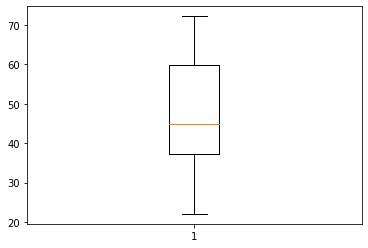

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

Tumors = [bestmeds['Tumor Volume (mm3)']]

fig3, ax1 = plt.subplots()
ax1.boxplot(Tumors)
plt.show()

In [26]:

np.quantile

<function numpy.quantile(a, q, axis=None, out=None, overwrite_input=False, interpolation='linear', keepdims=False)>

In [38]:
# Calculate the IQRand quantitatively determine if there are any potential outliers. 

quartiles = [.25,.5,.75]
quantiles = np.quantile(Tumors, quartiles)
lowerq = quantiles[0]
upperq = quantiles[2]
iqr = upperq - lowerq

lowoutliers = lowerq - (1.5*iqr)
upperoutliers = upperq + (1.5*iqr)

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The median is: {quantiles[1]} ")
print(f"The potential outliers are below {lowoutliers} or upper {upperoutliers}")

The lower quartile is: 37.187743802499995
The upper quartile is: 59.930261755000004
The interquartile range is: 22.74251795250001
The median is: 45.0 
The potential outliers are below 3.0739668737499812 or upper 94.04403868375002


In [47]:
outliers = bestmeds.loc[(bestmeds['Tumor Volume (mm3)'] < lowoutliers) | (bestmeds['Tumor Volume (mm3)'] > upperoutliers)]
outliers.count()

Drug Regimen          0
Sex                   0
Age_months            0
Weight (g)            0
Timepoint             0
Tumor Volume (mm3)    0
Metastatic Sites      0
dtype: int64

## Line and scatter plots

In [52]:
bestmeds.head(10)

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a275,Ceftamin,Female,20,28,45,62.999356,3
a411,Ramicane,Male,3,22,45,38.407618,1
a444,Ramicane,Female,10,25,45,43.047543,0
a520,Ramicane,Male,13,21,45,38.810366,1
a577,Infubinol,Female,6,25,30,57.031862,2
a644,Ramicane,Female,7,17,45,32.978522,1
a685,Infubinol,Male,8,30,45,66.083066,3


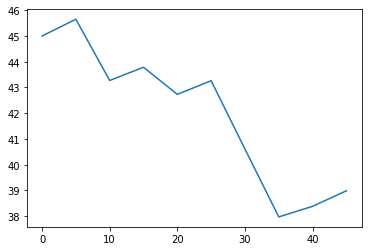

In [59]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mimi = mouse_study.loc[mouse_study['Mouse ID'].isin(['b128'])]
xval = mimi['Timepoint']
yval = mimi['Tumor Volume (mm3)']
plt.plot(xval, yval)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

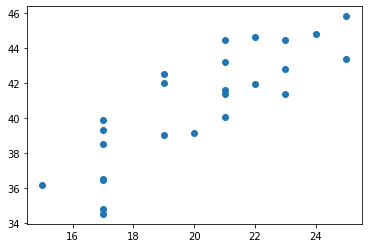

In [66]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capo = mouse_study.loc[mouse_study['Drug Regimen'].isin(['Capomulin'])]
Capo = Capo.groupby(['Mouse ID']).mean()

xvalues = Capo['Weight (g)']
yvalues = Capo['Tumor Volume (mm3)']
plt.scatter(xvalues, yvalues)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

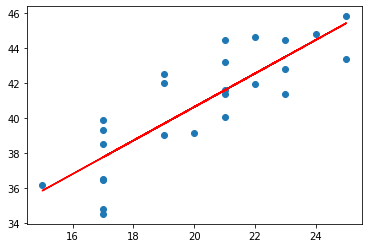

In [70]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
equation = f'y ={round(slope,2)} x  + {round(intercept,2)}'
plt.scatter(xvalues, yvalues)
plt.plot(xvalues,regress_values,'r-')
plt.show

